In [1]:
import pandas as pd
import psycopg2
import sqlalchemy
import csv
connection_settings = {
    'user': 'dap',
    'password': 'dap',
    'host': '192.168.56.30',
    'port': '5432',
    'database': 'climate'}

In [2]:
def read_table(table_name, connection_settings):
    try:
        # Connect to the PostgreSQL database
        dbConnection = psycopg2.connect(**connection_settings)
        dbCursor = dbConnection.cursor()
        query = f'SELECT * FROM {table_name};'
        dbCursor.execute(query)

        # Get all column names and data   
        data = dbCursor.fetchall()
        columns = [desc[0] for desc in dbCursor.description]

        # Convert data to a Pandas DataFrame
        df = pd.DataFrame(data, columns=columns)

        return df
    except (Exception, psycopg2.Error) as dbError:
        print(f"Error while connecting to PostgreSQL or querying table {table_name}: {dbError}")
        return None
    finally:
        if dbConnection:
            dbConnection.close()

In [3]:
####### first undedited code, left out because it takes a long time to load

#import pandas as pd
#import matplotlib.pyplot as plt
#df = pd.read_csv('df_melted_all.txt', sep='\t')
#df['Year'] = pd.to_datetime(df['Year'], format='%Y')
#df = df.set_index('Year')
#fig, ax = plt.subplots(figsize=(10, 6))
#df.groupby('Country')['CO2 Emissions'].plot(legend=True, ax=ax)
#ax.set_xlabel('Year')
#ax.set_ylabel('CO2 Emissions')
#ax.set_title('Time Series Graph of CO2 Emissions by Country')
#plt.show()

                        Country or Area  CO2 Emissions
Year                                                  
2010-01-01                  Afghanistan         0.3042
2010-01-01  Africa Eastern and Southern         1.0175
2010-01-01   Africa Western and Central         0.4478
2010-01-01                      Albania         1.6428
2010-01-01                      Algeria         3.1844
...                                 ...            ...
2020-01-01                     Viet Nam         3.6764
2020-01-01                        World         4.2919
2020-01-01                  Yemen, Rep.         0.3085
2020-01-01                       Zambia         0.4019
2020-01-01                     Zimbabwe         0.5305

[2629 rows x 2 columns]


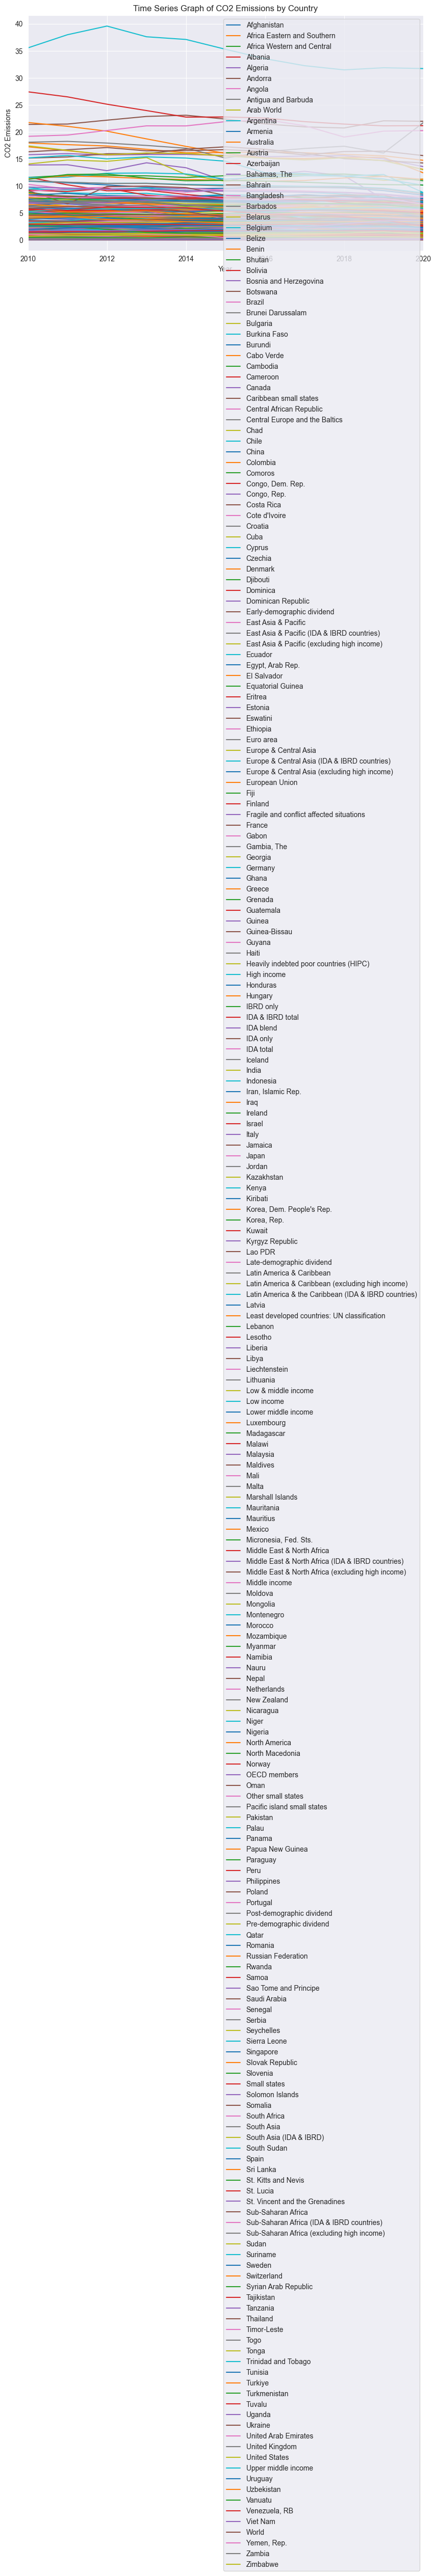

In [6]:
###Filter applied to year

import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('df_melted_all.txt', sep='\t')
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df = df.set_index('Year')
df = df[(df.index >= '2010-01-01') & (df.index <= '2020-12-31')] ###filter by year
fig, ax = plt.subplots(figsize=(10, 6))
print(df)
df.groupby('Country or Area')['CO2 Emissions'].plot(legend=True, ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('CO2 Emissions')
ax.set_title('Time Series Graph of CO2 Emissions by Country')
plt.show()

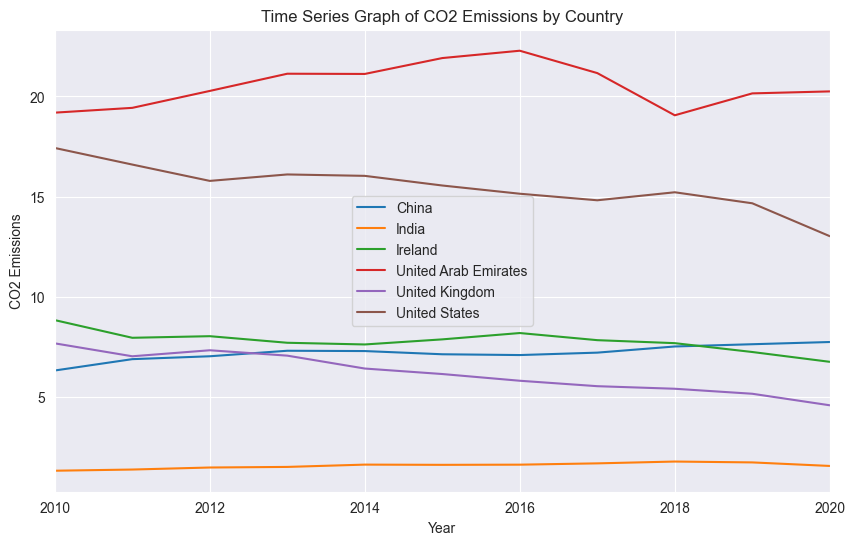

In [8]:
##Filter applied to year and country
df = pd.read_csv('df_melted_all.txt', sep='\t')
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df = df.set_index('Year')
df = df[(df.index >= '2010-01-01') & (df.index <= '2020-12-31')]

#Edit here for country list
df = df[df['Country or Area'].isin(['Ireland', 'United Kingdom', 'United States', 'China', 'United Arab Emirates', 'India'])]

fig, ax = plt.subplots(figsize=(10, 6))
df.groupby('Country or Area')['CO2 Emissions'].plot(legend=True, ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('CO2 Emissions')
ax.set_title('Time Series Graph of CO2 Emissions by Country')
plt.show()

C:\Users\rames\AppData\Local\Temp\ipykernel_4428\3327439799.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  air_pollution_df = pd.read_sql(sql_query, dbConnection)


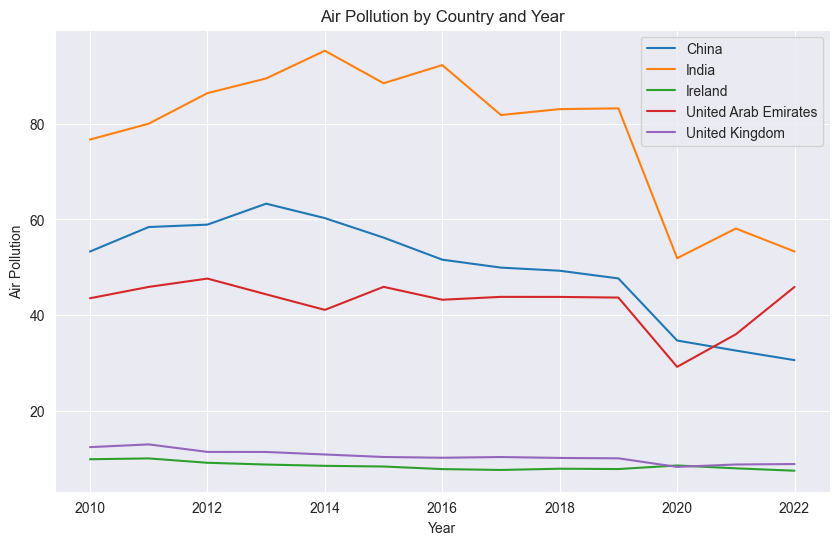

In [12]:

import pandas as pd
import matplotlib.pyplot as plt
import psycopg2


dbConnection = psycopg2.connect(user='dap',
password='dap',
host='192.168.56.30',
port='5432',
database='climate')

sql_query = "SELECT * FROM air_pollution"
table_name = 'air_pollution'

air_pollution_df = pd.read_sql(sql_query, dbConnection)

dbConnection.close()

# Reshaping the data and applying filters
air_pollution_df = pd.melt(air_pollution_df, id_vars=['Country or Area'], value_vars=[str(i) for i in range(2010, 2023)], var_name='year', value_name='air_pollution')

air_pollution_df['year'] = pd.to_numeric(air_pollution_df['year'], errors='coerce')

air_pollution_df = air_pollution_df.sort_values(by=['Country or Area', 'year'])

# Filter the data by the list of countries
countries = ['Ireland', 'United Kingdom', 'United States', 'China', 'United Arab Emirates', 'India']
air_pollution_df = air_pollution_df[air_pollution_df['Country or Area'].isin(countries)]

# Group the data by country and year
grouped = air_pollution_df.groupby(['Country or Area', 'year']).sum()

# Create a time series plot
plt.figure(figsize=(10,6))
for country, data in grouped.groupby(level=0):
    plt.plot(data.index.get_level_values(1), data['air_pollution'], label=country)
plt.title('Air Pollution by Country and Year')
plt.xlabel('Year')
plt.ylabel('Air Pollution')
plt.legend()
plt.show()

In [10]:
'''import pandas as pd
import matplotlib.pyplot as plt
import psycopg2

dbConnection = psycopg2.connect(user='dap',
password='dap',
host='192.168.56.30',
port='5432',
database='climate')

table_name = 'global_temperature'
sql_query = f"SELECT * FROM {table_name}"

global_temp_df = pd.read_sql(sql_query, dbConnection)

dbConnection.close()

global_temp_df['year'] = pd.to_numeric(global_temp_df['year'], errors='coerce')

# Filter the data for the years 2010-2022
global_temp_df = global_temp_df[(global_temp_df['year'] >= 2010) & (global_temp_df['year'] <= 2022)]


global_temp_df = global_temp_df.sort_values(by=['country', 'year'])

# Filter by countries
countries = ['Ireland', 'United Kingdom', 'United States', 'China', 'United Arab Emirates', 'India']
global_temp_df = global_temp_df[global_temp_df['country'].isin(countries)]

grouped = global_temp_df.groupby(['country', 'year']).mean()

plt.figure(figsize=(10,6))
for country, data in grouped.groupby(level=0):
    plt.plot(data.index.get_level_values(1), data['average_temperature'], label=country)
plt.title('Average Temperature by Country and Year (2010-2022)')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.legend()
plt.show()'''

C:\Users\rames\AppData\Local\Temp\ipykernel_4428\4200930111.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  global_temp_df = pd.read_sql(sql_query, dbConnection)


DatabaseError: Execution failed on sql 'SELECT * FROM global_temperature': relation "global_temperature" does not exist
LINE 1: SELECT * FROM global_temperature
                      ^


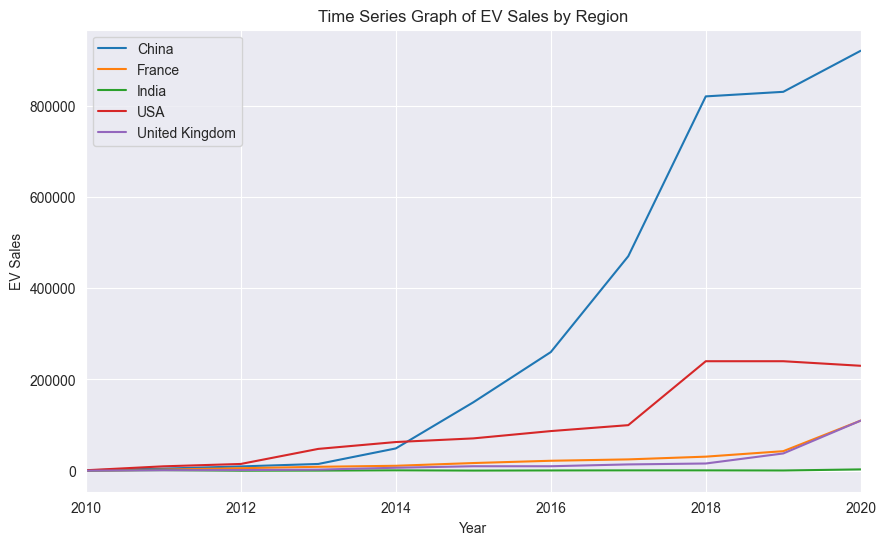

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('ev_car_sales.csv')
df = df[(df['category'] == 'Historical') & (df['parameter'] == 'EV sales') & (df['mode'] == 'Cars') & (df['powertrain'] == 'BEV') & (df['unit'] == 'Vehicles')]
df['year'] = pd.to_datetime(df['year'], format='%Y')
df = df.set_index('year')
df = df[(df.index >= '2010-01-01') & (df.index <= '2020-12-31')]
df = df[df['region'].isin(['France', 'United Kingdom', 'USA', 'China', 'Isreal', 'India'])] ###EDIT HERE FOR COUNTRIES
fig, ax = plt.subplots(figsize=(10, 6))
df.groupby('region')['value'].plot(legend=True, ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('EV Sales')
ax.set_title('Time Series Graph of EV Sales by Region')
plt.show()